<a href="https://colab.research.google.com/github/phonglam3103/Cheminformatics/blob/main/Multiple_ROC_AUC_generalized.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
%cd drive/MyDrive/Project/ROC_AUC_MixMD

/content/drive/MyDrive/Project/ROC_AUC_MixMD


Note on how to organize data:
Each column corresponds for the label of active (1) or inactive (0) in an ascending order (the most likely compounds will be on top! ie. lowest docking score on top or highest similarity score on top)

This program doesn't care about your score, only the label itself.

Here is an example of how to organize the file:



In [17]:
#@markdown #Example

import pandas as pd

# Define the data
data = {
    "Model 1": [1, 1, 1, 0, 0, 0, 0, 0, 1, 0],
    "Model 2": [0, 0, 0, 0, 0, 0, 0, 1, 0, 1],
    "Model 3": [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
}

# Create DataFrame
df = pd.DataFrame(data)

df

,Model 1,Model 2,Model 3
0,1,0,0
1,1,0,0
2,1,0,0
3,0,0,0
4,0,0,0
5,0,0,0
6,0,0,0
7,0,1,0
8,1,0,0
9,0,1,0


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns

plt.rcParams["figure.figsize"] = (5,5)
plt.rcParams["figure.dpi"] = 300

# Data input
data = pd.read_csv("ROC.csv")
data.fillna(0, inplace=True)

In [6]:
def cumsum(df):
  tpr=df.cumsum()/(len(df[df==1]))
  fpr=(1-df).cumsum()/(len(df[df==0]))
  return tpr, fpr

In [7]:
def plot(df, title):
  for model in df.columns:
    tpr, fpr = cumsum(df[model])
    auc = metrics.auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model} (AUC = {auc:.3f})')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(prop={'size': 8})
  plt.xlim(0,1)
  plt.ylim(0,1)
  plt.title(title)
  plt.axline((0, 0), (1, 1), linewidth=1, color='black', linestyle = "--")
  plt.show()


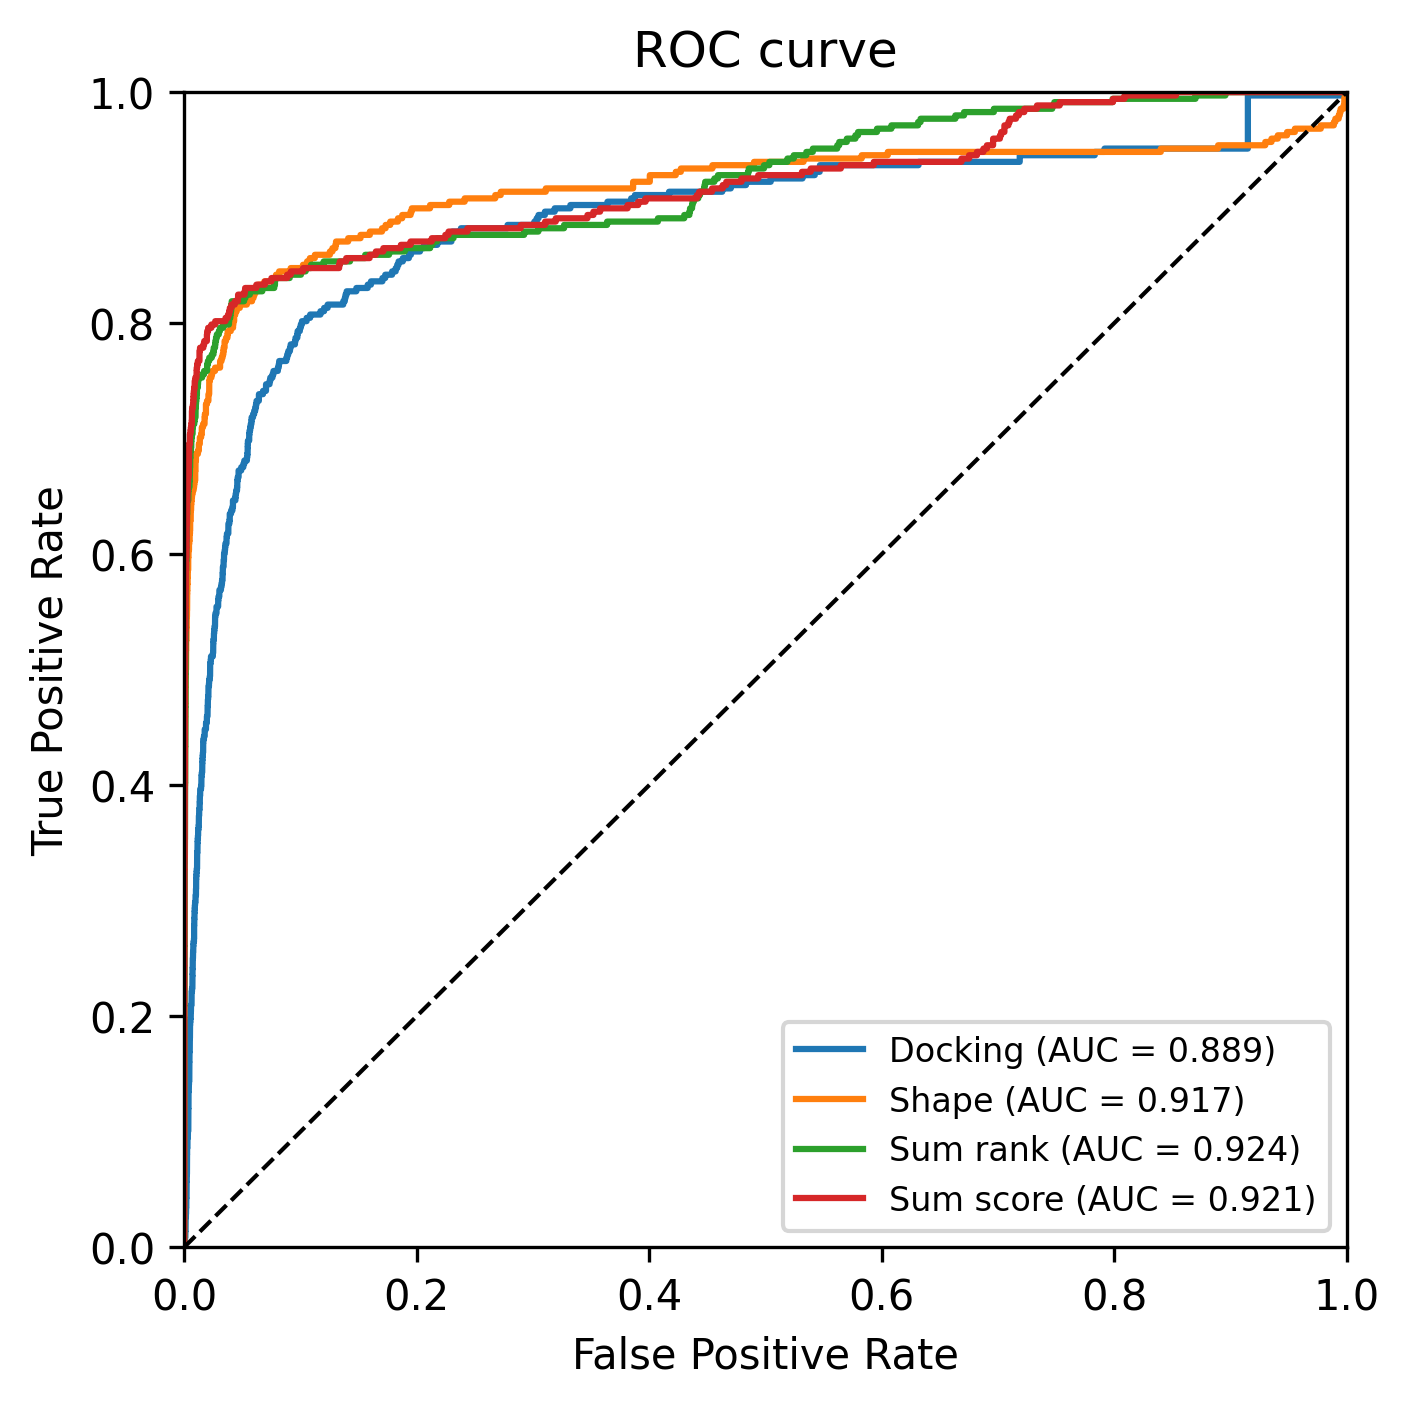

In [16]:
plot(data, 'ROC curve')